In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine, text

# Display preferences
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

insurance_df = pd.read_sql_query(text('SELECT * FROM houseprices'), con=engine.connect())

# No need for an open connection, because you're only doing a single query
engine.dispose()

insurance_df.head(10)



,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [2]:
for column_name in insurance_df.columns:
    print("Unique values in column {} are: {}".format(column_name, insurance_df[column_name].unique()))

Unique values in column id are: [   1    2    3 ... 1458 1459 1460]
Unique values in column mssubclass are: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column mszoning are: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column lotfrontage are: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values in column lotarea are: [ 8450  9600 11250 ... 17217 13175  9717]
Unique values in column street are: ['Pave' 'Grvl']
Unique values in column 

In [3]:
insurance_df.isnull().sum()*100/insurance_df.isnull().count()

id               0.000
mssubclass       0.000
mszoning         0.000
lotfrontage     17.740
lotarea          0.000
                 ...  
mosold           0.000
yrsold           0.000
saletype         0.000
salecondition    0.000
saleprice        0.000
Length: 81, dtype: float64

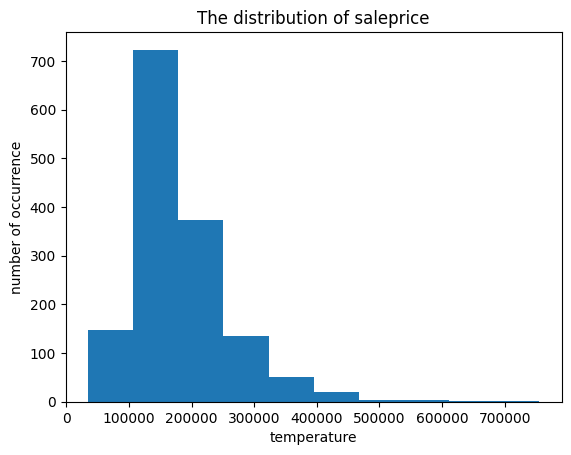

In [6]:
plt.hist(insurance_df.saleprice)
plt.title("The distribution of saleprice")
plt.xlabel("temperature")
plt.ylabel("number of occurrence")
plt.show()

In [7]:
insurance_df["is_street_pave"] = pd.get_dummies(insurance_df.street, drop_first=True)
insurance_df["is_centralair"] = pd.get_dummies(insurance_df.centralair, drop_first=True)
#street
#utilities
#centralair
#fullbath

In [8]:
# Look at the values in the categorical feature
insurance_df['fullbath'].value_counts()

2    768
1    650
3     33
0      9
Name: fullbath, dtype: int64

In [9]:
fullbath_df = pd.get_dummies(insurance_df['fullbath'])
fullbath_df.head()

,0,1,2,3
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In [10]:
new_df = insurance_df.drop(['fullbath'], axis =1).merge(fullbath_df,left_index=True, right_index=True)
new_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,yrsold,saletype,salecondition,saleprice,is_street_pave,is_centralair,0,1,2,3
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,2008,WD,Normal,208500,1,1,0,0,1,0
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,2007,WD,Normal,181500,1,1,0,0,1,0
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,2008,WD,Normal,223500,1,1,0,0,1,0
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000,1,1,0,1,0,0
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,2008,WD,Normal,250000,1,1,0,0,1,0


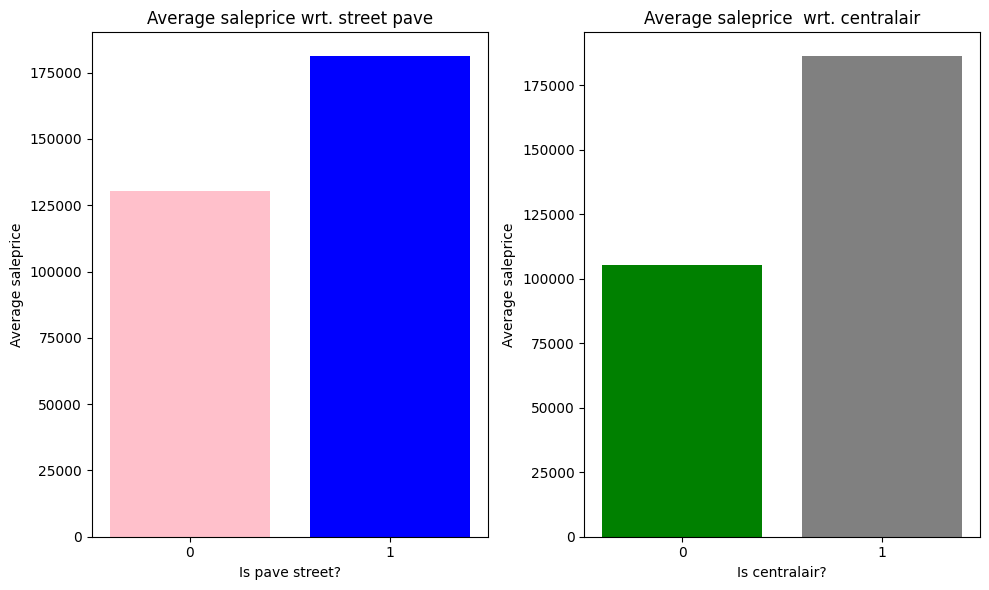

In [11]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(insurance_df.groupby("is_street_pave")["saleprice"].mean().index, insurance_df.groupby("is_street_pave")["saleprice"].mean(),
       color=("pink","blue"))
plt.title("Average saleprice wrt. street pave")
plt.ylabel("Average saleprice")
plt.xlabel("Is pave street?")
plt.xticks([0,1])

plt.subplot(1,2,2)
plt.bar(insurance_df.groupby("is_centralair")["saleprice"].mean().index, insurance_df.groupby("is_centralair")["saleprice"].mean(),
       color=("green","grey"))
plt.title("Average saleprice  wrt. centralair")
plt.ylabel("Average saleprice")
plt.xlabel("Is centralair?")
plt.xticks([0,1])

plt.tight_layout()
plt.show()


In [13]:
# `Y` is the target variable
Y = insurance_df['saleprice']
# `X` is the feature set which includes the
# `is_male` and `is_smoker` variables
X = insurance_df[['is_street_pave','is_centralair']]

# Create a `LinearRegression` model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# Fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [29284.71527228 80391.93189983]

Intercept: 
 76595.87873344858


In [20]:
import statsmodels.api as sm

# You need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     49.58
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.48e-21
Time:                        23:46:14   Log-Likelihood:                -18496.
No. Observations:                1460   AIC:                         3.700e+04
Df Residuals:                    1457   BIC:                         3.701e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            7.66e+04   3.19e+04      2.403      0.016    1.41e+04    1.39e+05
is_street_pave  2.928e+04   3.15e+04      0.928      0.353   -3.26e+04    9.12e+04
is_centralair   8.039e+04   8182.098      9.825      0.000    6.43e+04    9.64e+04
==============================================================================
Omnibus:                      650.899   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4067.146
Skew:                           1.988   Prob(JB):                         0.00
Kurtosis:                      10.145   Cond. No.                         37.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


Coefficients: 
 [2. 3.]

Intercept: 
 0.9999999997671694


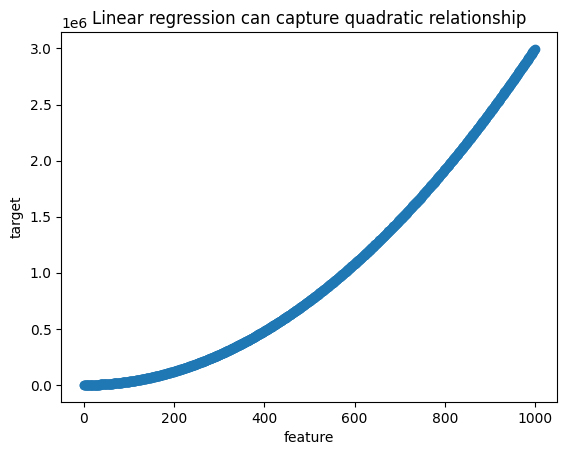

In [24]:
df = pd.DataFrame()

# Data from 0-999
df["X"] = np.arange(0,1000,1)
# Take the square of X
df["X_sq"] = df["X"]**2

# This is your equation: Y = 1 + 2*X + 3*X^2
df["Y"] = 1 + 2*df["X"] + 3*df["X_sq"]

# Fit a linear regression where target is `Y`
# and features are `X` and `X^2`
lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[["X","X_sq"]],df["Y"])

# Predictions of the linear regression
predictions = lrm_example.predict(df[["X","X_sq"]])

# Print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# Plot the estimated `Y` and `X`
# The relationship should be quadratic
plt.scatter(df["X"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

In [25]:
#predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

ValueError: ignored

In [22]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

NameError: ignored

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


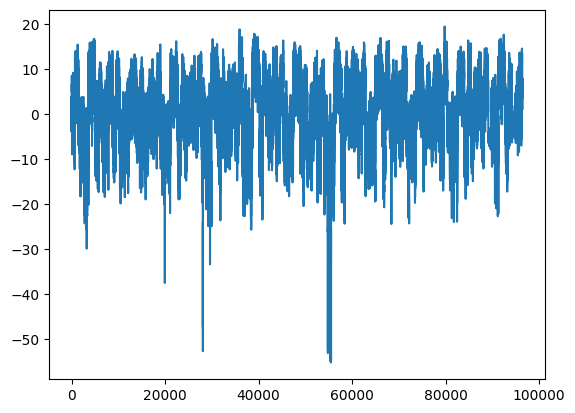

In [ ]:
plt.plot(errors)
plt.show()

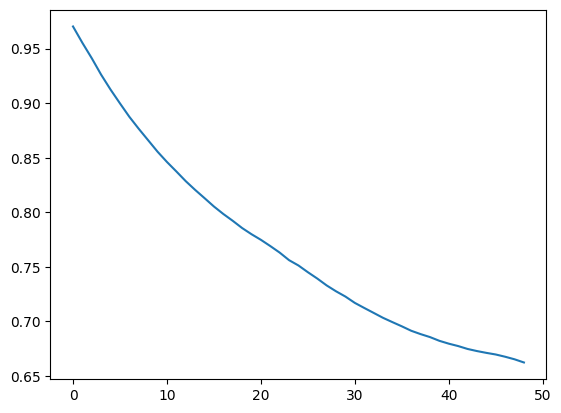

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

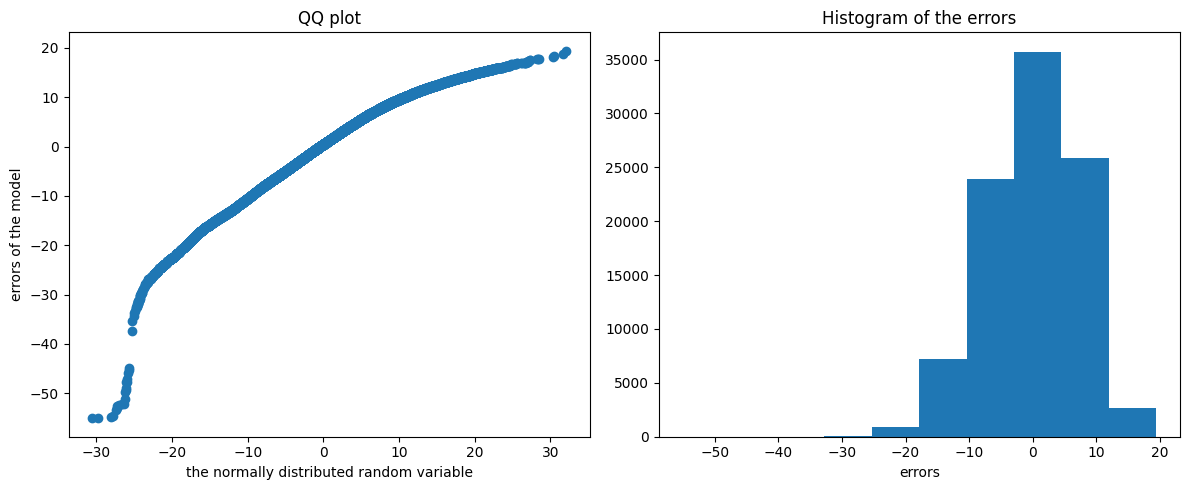

In [ ]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # Sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [ ]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.2967352523547 and p value is 0.0
Normality test statistics is 3375.4323076995743 and p value is 0.0
